In [1]:
#load and perform basic data exploration over Mnist dataset ; https://www.kaggle.com/c/digit-recognizer/data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
data=pd.read_csv('/Users/princebharti/Desktop/dataset/mnist_train.csv')

In [49]:
type(data)

pandas.core.frame.DataFrame

In [50]:
data.shape # shape of df

(42000, 785)

In [51]:
data.head() # show first 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
label=data['label'] # save the label of the data into the variable label

In [53]:
data=data.drop('label',axis=1)

In [54]:
data.shape

(42000, 784)

label for the choosen index is  3


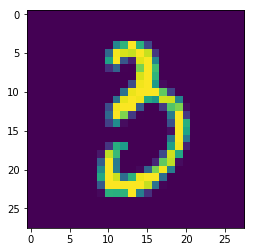

In [55]:
#display one of the data point
idx=150
grid_data=data.iloc[idx].as_matrix().reshape((28,28))
plt.imshow(grid_data)
print('label for the choosen index is ',label[idx])

visualisation using PCA

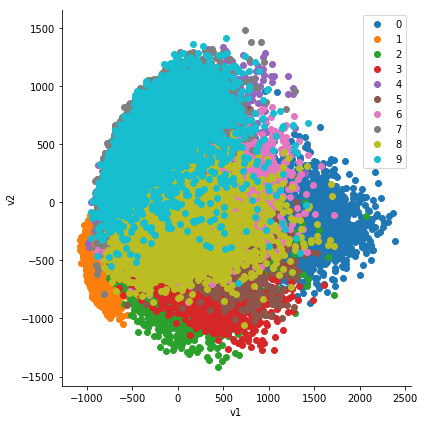

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
d=pca.fit_transform(data)
df=pd.DataFrame(d,columns=['v1','v2'])
df['label']=label
df.shape

g=sns.FacetGrid(data=df,hue='label',size=6)
g.map(plt.scatter, 'v1','v2')
plt.legend()
plt.tight_layout()

## PCA for non-visualisation

In [108]:
pca=PCA(n_components=784)
pca_data=pca.fit_transform(data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_variance=np.cumsum(percentage_var_explained)



Text(0,0.5,'Cumulative_explained_variance')

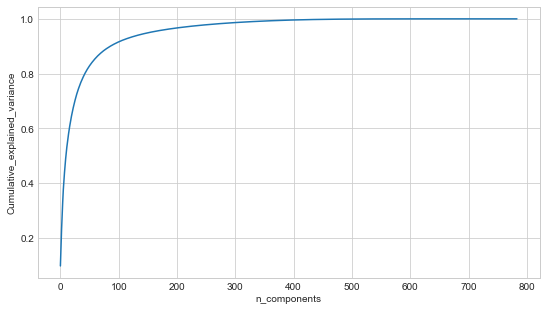

In [111]:
plt.figure(figsize=(9,5))
sns.set_style(style='whitegrid')
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
#we can see that first 200 components can explain 90% variance